# TRAVEL PACKAGE PREDICTION

# IMPORTING LIBRARIES

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# IMPORTING DATASET

In [2]:
df = pd.read_csv('tour_package.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observations:**

*Age:* Min: 18, Max: 61, Mean: 37

*MonthlyIncome:* Min: 1000, Max: 98678, Mean: 23619

*DurationOfPitch:* Min: 5 mins, Max: 127 mins

*NumberOfTrips:* Min: 1, Max: 22



In [6]:
numeric_cols = df.describe().columns
categ_cols = df.drop(numeric_cols, axis=1).columns
for i in categ_cols:
    print('*'*50)
    print(f'{i}: {df[i].unique()}')

**************************************************
TypeofContact: ['Self Enquiry' 'Company Invited' nan]
**************************************************
Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
**************************************************
Gender: ['Female' 'Male' 'Fe Male']
**************************************************
ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
**************************************************
MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']
**************************************************
Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


# DATA PRE PROCESSING

In [7]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df.drop('CustomerID', axis=1, inplace=True)

In [8]:
numeric_cols = df.describe().columns
categ_cols = df.drop(numeric_cols, axis=1).columns
categ_cols

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [9]:
df[categ_cols].describe(include='all').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


## Creating Bins

### Age

In [10]:
df['Age'].describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [11]:
df['Age_Bin'] = pd.cut(df['Age'], bins=[18, 25, 30, 40, 50, 70], labels=['18-25', '26-30', '31-40', '41-50', '51-65'])

### Monthly Income

In [12]:
df['MonthlyIncome'].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [13]:
df['Salary_Bin'] = pd.cut(df['MonthlyIncome'], bins=[0, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 100000], labels=['<15000', '<20000', '<25000', '<30000', '<35000', '<40000', '<50000', '<100000'])

In [14]:
df['Salary_Bin'].value_counts()

Salary_Bin
<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<50000        0
Name: count, dtype: int64

# UNIVARIATE ANALYSIS (PENDING)

In [15]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'Age_Bin',
       'Salary_Bin'],
      dtype='object')

In [16]:
def plot_data_distribution(data):
    """
    This function plots a combined graph for univariate analysis of a continuous variable.
    It checks the spread, central tendency, dispersion, and outliers of the data.
    """
    variable_name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(8, 5))
    
    mean_value = data.mean()
    median_value = data.median()
    mode_value = data.mode().tolist()[0] if not data.mode().empty else None

    sns.set_theme(style="white")
    fig.suptitle(f"SPREAD OF DATA FOR {variable_name}", fontsize=18, fontweight='bold')
    
    sns.boxplot(x=data, showmeans=True, orient='h', color="teal", ax=ax_box)
    ax_box.set_xlabel('')

    sns.despine(top=True, right=True, left=True)
    sns.histplot(data, kde=False, color='purple', ax=ax_dis)

    ax_dis.axvline(mean_value, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median_value, color='g', linestyle='-', linewidth=2)
    if mode_value is not None:
        ax_dis.axvline(mode_value, color='y', linestyle='-', linewidth=2)

    plt.legend({'Mean': mean_value, 'Median': median_value, 'Mode': mode_value})

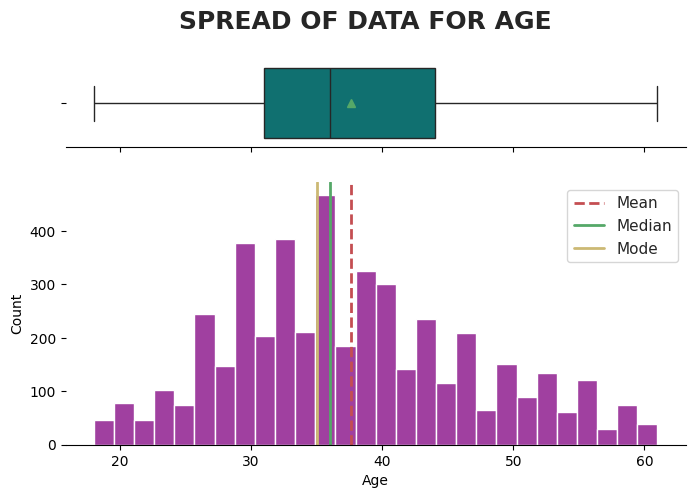

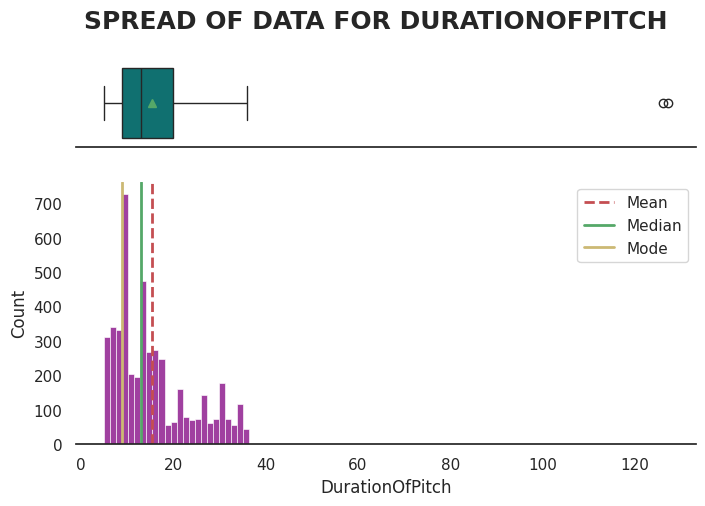

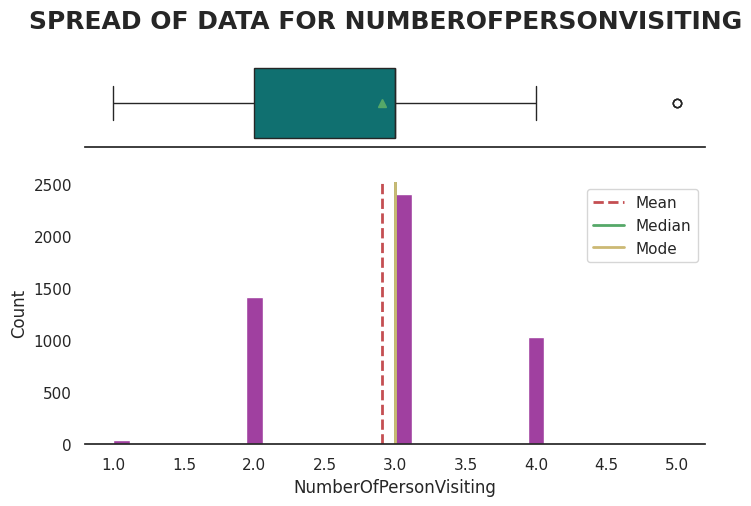

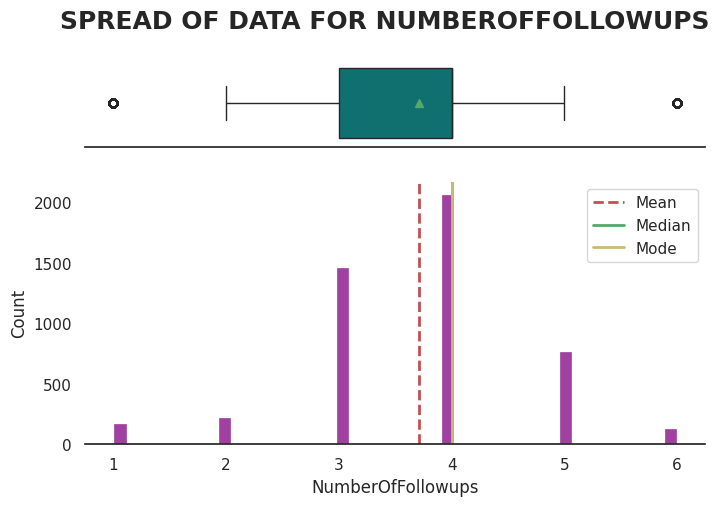

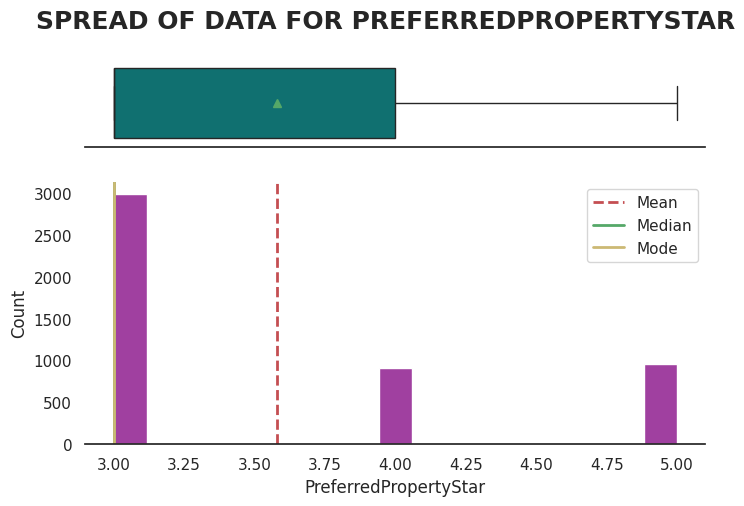

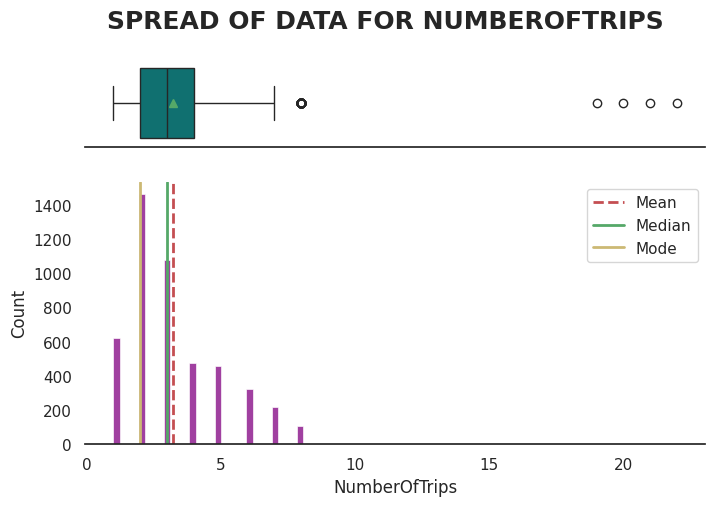

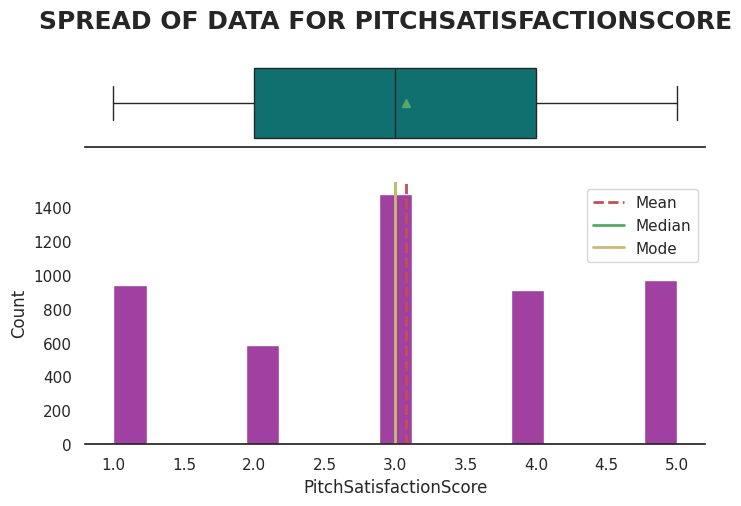

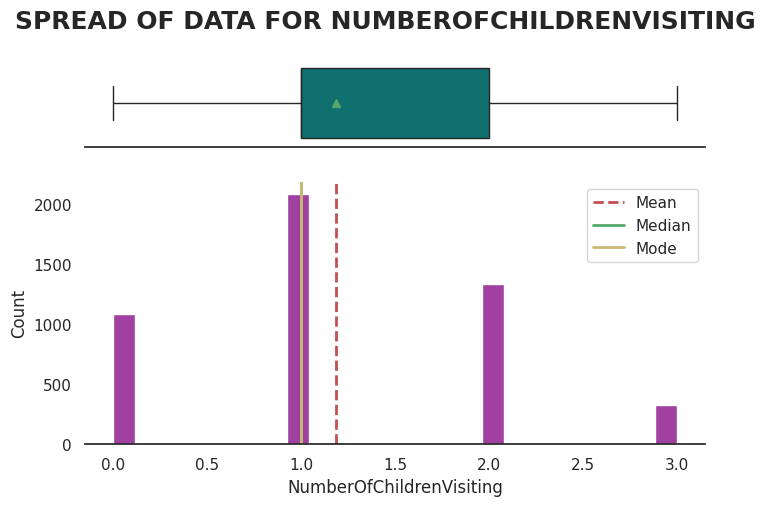

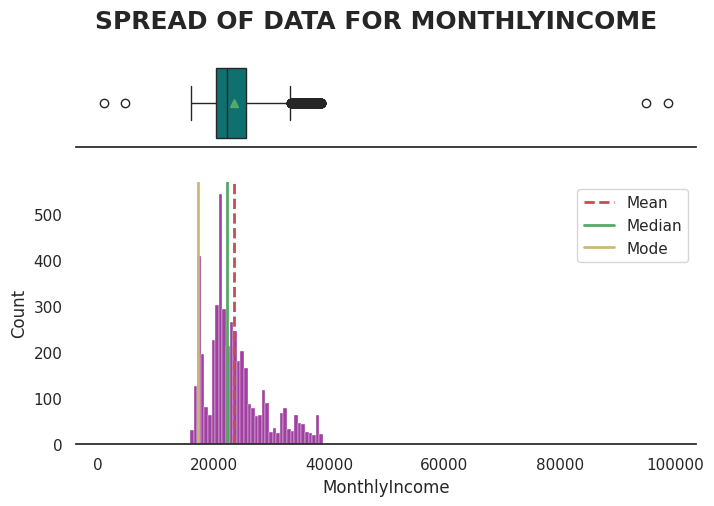

In [17]:
cols = [
 'Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']


for i in range(len(cols)):
    plot_data_distribution(df[cols[i]])

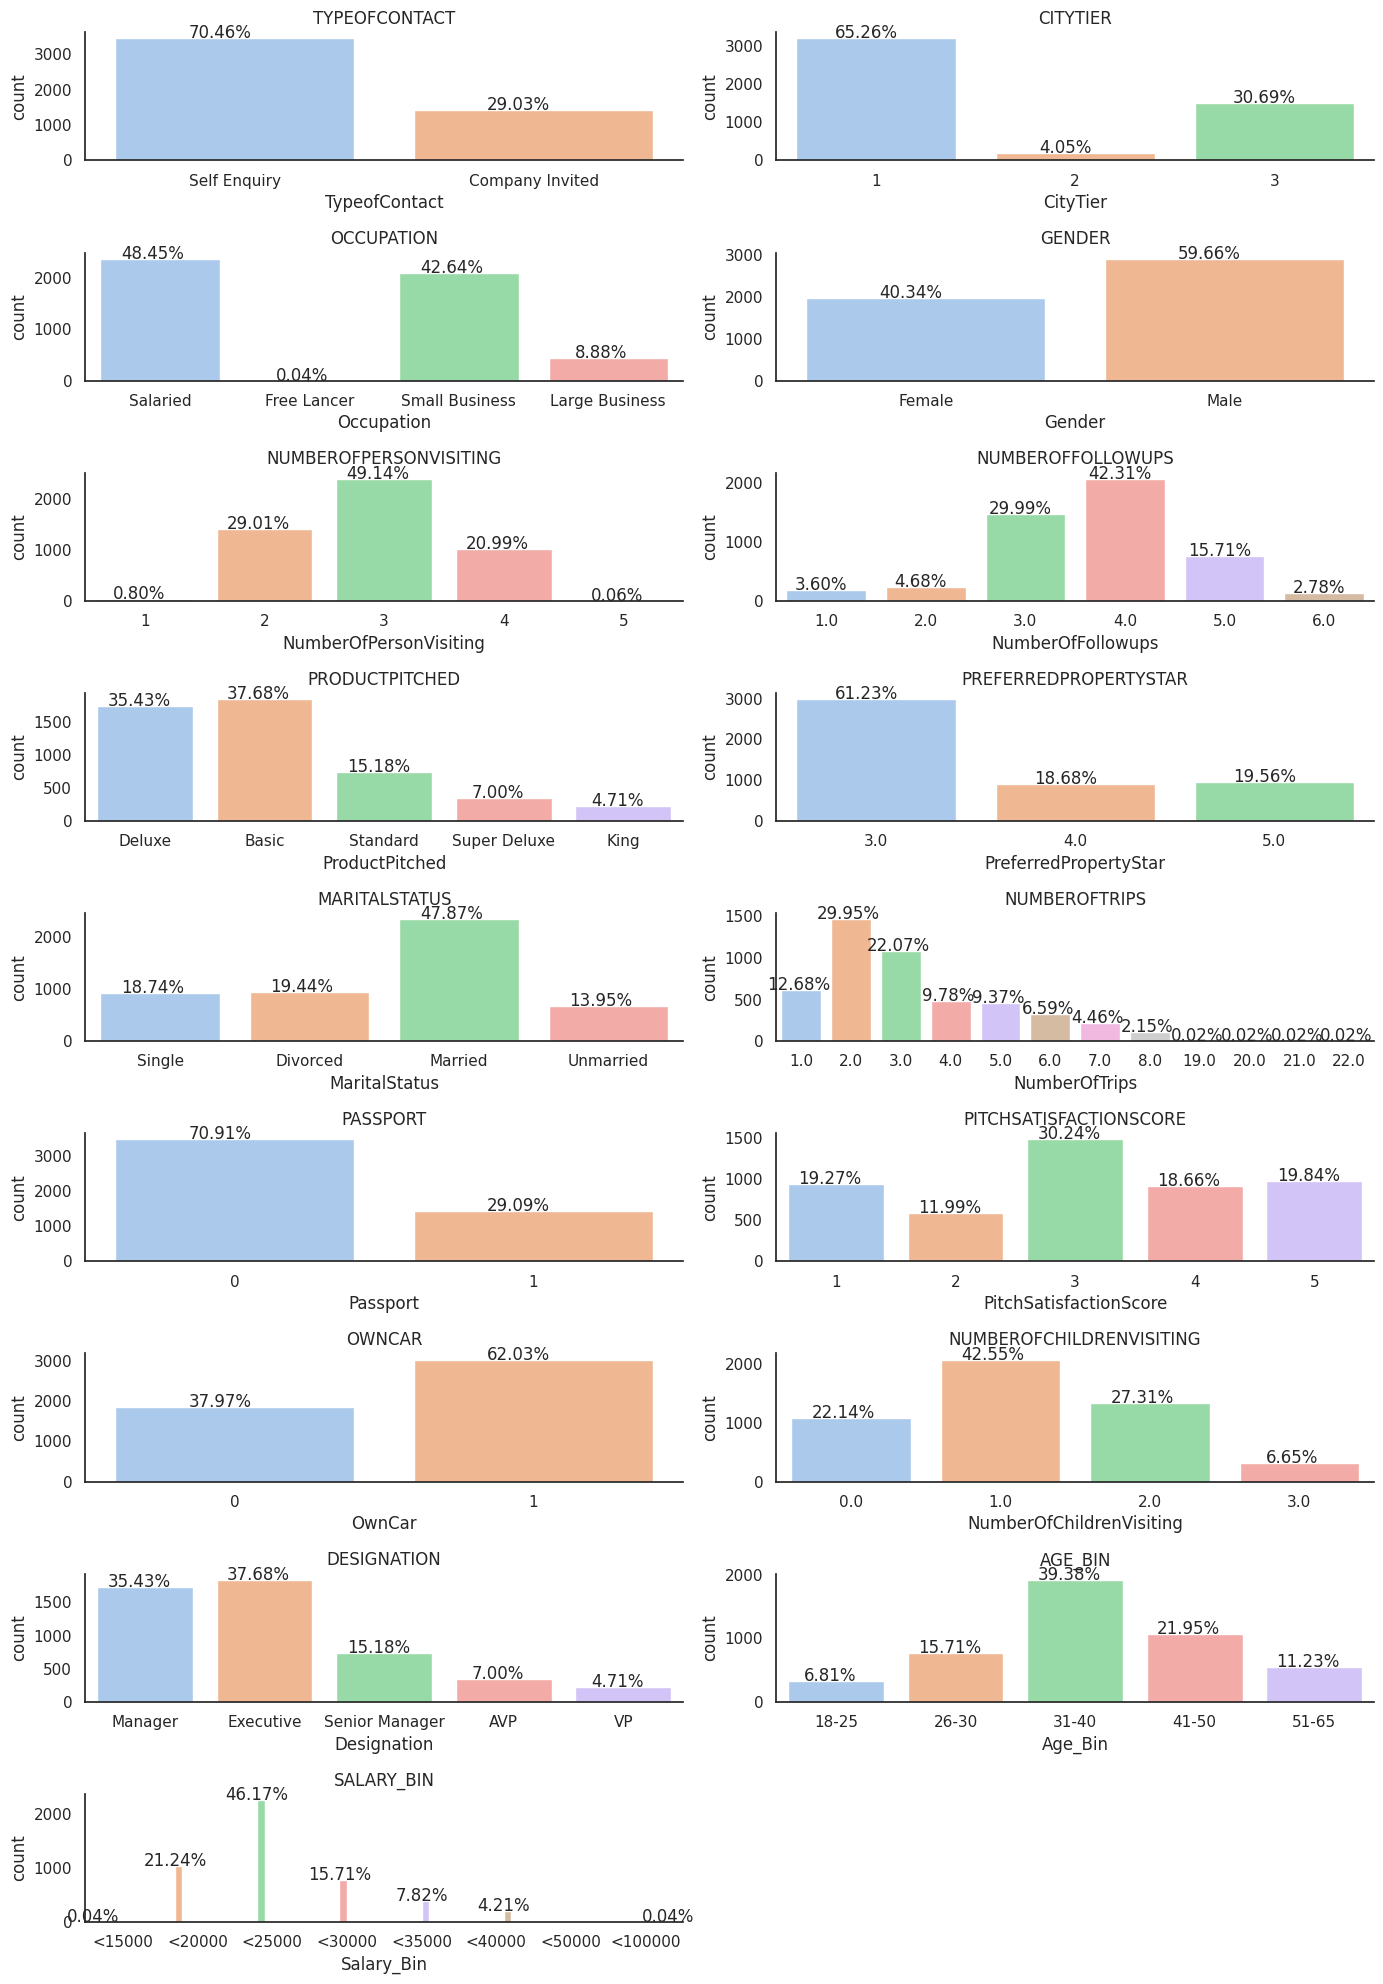

In [18]:
plt.figure(figsize=(14, 20))

cols=['TypeofContact', 'CityTier',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'Age_Bin',
       'Salary_Bin']

colors = sns.color_palette("pastel")

for i, variable in enumerate(cols):
    plt.subplot(9, 2, i + 1)
    ax = sns.countplot(x=df[variable], hue=df[variable], data=df, palette=colors, legend=False)
    sns.despine(top=True, right=True, left=False)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height() / len(df[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha='center')
    plt.tight_layout()
    plt.title(cols[i].upper())

plt.show()

# MULTIVARIATE ANALYSIS (PENDING)

In [19]:
df2 = df.copy()
df2.drop(['ProdTaken'], axis=1, inplace=True)

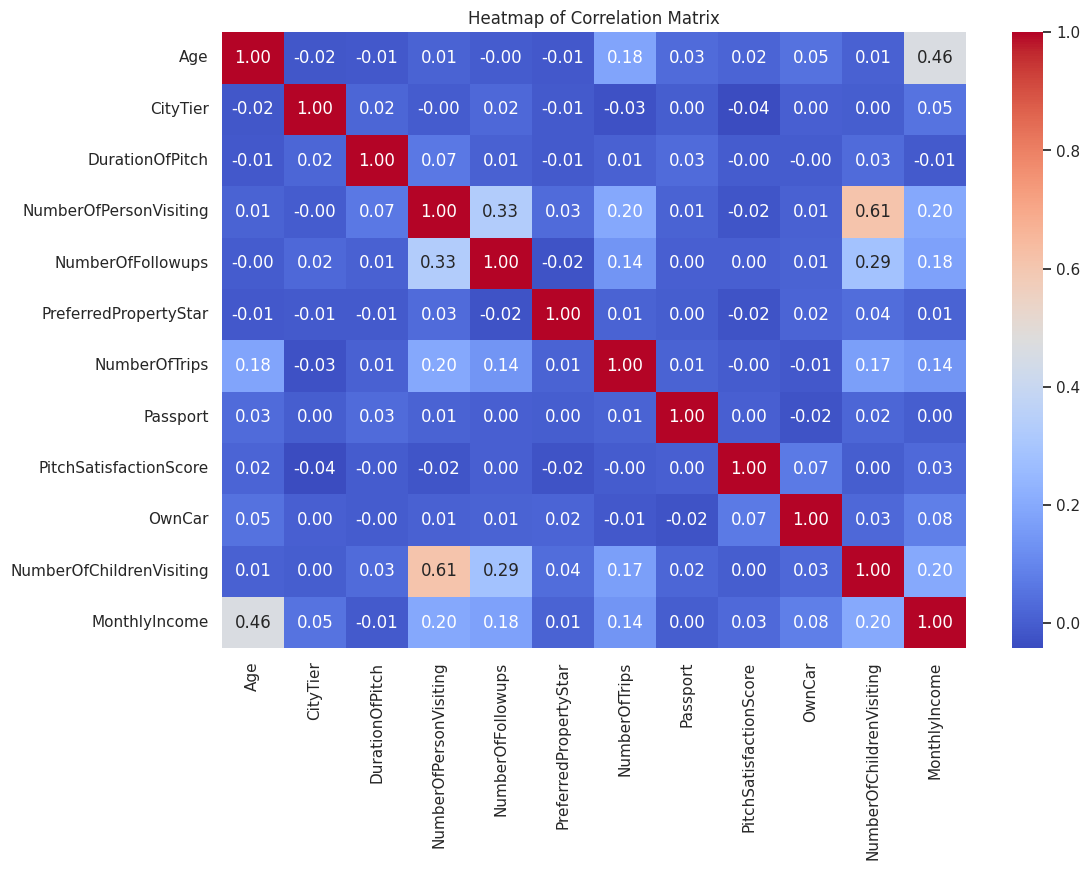

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df2[df2.describe().columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# OUTLIER DETECTION

In [21]:
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).drop(columns='ProdTaken')
    
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    
    df_out = df[~((df[numeric_cols.columns] < (Q1 - 1.5 * IQR)) | (df[numeric_cols.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_out

df_clean = remove_outliers(df)

In [22]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4143.0,0.189959,0.392316,0.0,0.00,0.0,0.00,1.0
Age,3934.0,36.745806,9.041782,18.0,30.00,36.0,42.00,61.0
CityTier,4143.0,1.674391,0.925229,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,3909.0,15.607061,8.239885,5.0,9.00,14.0,21.00,36.0
NumberOfPersonVisiting,4143.0,2.883659,0.724464,1.0,2.00,3.0,3.00,4.0
NumberOfFollowups,4098.0,3.722060,0.790539,2.0,3.00,4.0,4.00,5.0
PreferredPropertyStar,4143.0,3.583152,0.795494,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4143.0,3.096307,1.640754,1.0,2.00,3.0,4.00,7.0
Passport,4143.0,0.291576,0.454543,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,4143.0,3.076997,1.355679,1.0,2.00,3.0,4.00,5.0


In [23]:
non_numeric_cols = df_clean.select_dtypes(exclude=[np.number]).columns
df_clean = df_clean.copy()
df_clean[non_numeric_cols] = df_clean[non_numeric_cols].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4143 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4143 non-null   int64   
 1   Age                       3934 non-null   float64 
 2   TypeofContact             4122 non-null   category
 3   CityTier                  4143 non-null   int64   
 4   DurationOfPitch           3909 non-null   float64 
 5   Occupation                4143 non-null   category
 6   Gender                    4143 non-null   category
 7   NumberOfPersonVisiting    4143 non-null   int64   
 8   NumberOfFollowups         4098 non-null   float64 
 9   ProductPitched            4143 non-null   category
 10  PreferredPropertyStar     4143 non-null   float64 
 11  MaritalStatus             4143 non-null   category
 12  NumberOfTrips             4143 non-null   float64 
 13  Passport                  4143 non-null   int64   
 1

In [24]:
df_clean.describe(include='category').T

,count,unique,top,freq
TypeofContact,4122,2,Self Enquiry,2905
Occupation,4143,4,Salaried,1983
Gender,4143,2,Male,2455
ProductPitched,4143,5,Basic,1661
MaritalStatus,4143,4,Married,1946
Designation,4143,5,Executive,1661
Age_Bin,3920,5,31-40,1725
Salary_Bin,3922,4,<25000,2034


# HANDLING MISSING VALUES

In [25]:
df = df_clean.copy()

In [26]:
df = df.drop(['Age_Bin', 'Salary_Bin'], axis=1)

In [27]:
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(0)
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(0)
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(0)
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)

In [28]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       2905
Company Invited    1217
Name: count, dtype: int64

In [29]:
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')

In [30]:
df['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    2534
5.0     807
4.0     802
Name: count, dtype: int64

In [31]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])

In [32]:
df.dropna(subset=['Age', 'MonthlyIncome'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [33]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [34]:
len(df.columns)

19

# FEATURE SELECTION AND DIMENSIONALITY REDUCTION

In [35]:

X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']


### Converting categorical variables to numeric

In [36]:
X = pd.get_dummies(X)
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,False,False,False,True,False,False,False,True,False,False
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,False,True,False,False,False,False,False,True,False,False
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,False,False,False,True,False,False,True,False,False,False
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,False,True,False,False,False,False,True,False,False,False
4,32.0,1,8.0,3,3.0,3.0,1.0,0,5,1,...,False,False,False,True,False,False,True,False,False,False


### Balancing dataset

In [37]:
from imblearn.combine import SMOTEENN

resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(X, y)

X, y = X_resampled, y_resampled

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print(df_resampled.shape)
print(df_resampled[df_resampled['ProdTaken'] == 1].shape)
print(df_resampled[df_resampled['ProdTaken'] == 0].shape)

(4148, 35)
(2451, 35)
(1697, 35)


### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling the dataset

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# APPLYING MODELS

## BEFORE HYPERPARAMETER TUNING

In [48]:
import pandas as pd
from sklearn.model_selection import cross_val_score

models = {
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'bc': BaggingClassifier(),
    'abc': AdaBoostClassifier(),
    'gbc': GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    results.append({
        'model': model_name,
        'average_cv_score': cv_scores.mean()
    })

results_df = pd.DataFrame(results)
results_df

,model,average_cv_score
0,dtc,0.905362
1,rfc,0.961426
2,bc,0.931587
3,abc,0.859256
4,gbc,0.906568


## AFTER HYPERPARAMETER TUNING

In [41]:



model_params = {
    'dtc': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    },
    'rfc': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    },
    'bc': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_samples': [0.5, 1.0],
            'max_features': [0.5, 1.0]
        }
    },
    'abc': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'gbc': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    }
}

In [42]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

scores = []
# iterate over model_params and apply gridsearchcv
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [44]:
pd.DataFrame(scores)

,model,best_score,best_params
0,dtc,0.906571,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
1,rfc,0.961427,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
2,bc,0.967452,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e..."
3,abc,0.893313,"{'learning_rate': 1.0, 'n_estimators': 200}"
4,gbc,0.972273,"{'learning_rate': 0.1, 'max_depth': 10, 'min_s..."


In [46]:
scores

[{'model': 'dtc',
  'best_score': 0.9065706263969906,
  'best_params': {'max_depth': 20,
   'min_samples_leaf': 1,
   'min_samples_split': 2}},
 {'model': 'rfc',
  'best_score': 0.9614271565901615,
  'best_params': {'max_depth': 20,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100}},
 {'model': 'bc',
  'best_score': 0.9674521615875266,
  'best_params': {'max_features': 0.5,
   'max_samples': 1.0,
   'n_estimators': 200}},
 {'model': 'abc',
  'best_score': 0.8933126169837722,
  'best_params': {'learning_rate': 1.0, 'n_estimators': 200}},
 {'model': 'gbc',
  'best_score': 0.9722732559196061,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 10,
   'min_samples_leaf': 5,
   'min_samples_split': 10,
   'n_estimators': 200}}]